# Phase 3 Code Challenge Review

_Dec 18, 2020_

Agenda:
- Gradient Descent & Cost Function
- Logistic Regression
- Evaluation Metrics
- Decision Trees

## Part I. Gradient Descent & Cost Function
- What is a cost function? What are we trying to find?
- How to use gd to find the lowest point? How does the gradient change as we get closer to the bottom?
- What's the role learning rate play? How can learning rate affect your result? 


$$ \theta_j := \theta_j - \alpha * \frac{\partial J(\theta)}{\partial\theta_i} $$

### Class Notes:

- for linear regression, it is MSE and essentially y - y_hat
- be able to define gradient descent and cost function for linear regression
- gradient of cost function with regards to the parameter
- slope gets smaller as you go down the curve for gradient descent
- learning rate too large, might miss the minimum  and learning rate too small, converge too slowly
- what is gradient?  what is a cost function?


### Cost Function

- In ML, cost functions used to estimate how badly models are performing
- measure of how wrong model is in terms of ability to estimate relationship between X and y
- typically expressed as difference or distance between predicted and actual value
- cost function (also loss or error) can be estimated by iteratively running model to compare estimated predictions against “ground truth” — known values of y
- objective of ML model, therefore, is to find parameters, weights or structure that minimises cost function

$$ J(m, b) = \sum_{i=1}^n (y_i - \hat{y})(mx_i + b)^2 = \sum_{i=1}^n (y_i - (mx_i + b))^2 $$

- m is weight and b is bias
- MSE is L2 loss and MAE is L1 loss

### Gradient Descent

- models learn by minimizing cost function by using gradient descent, efficient optimization algorithm that attempts to find local/global minima
- enables model to learn gradient/direction that model should take in order to reduce errors (diff b/w actual and predicted y)
- direction refers to how model parameters b0 and b1 should be tweaked or corrected to further reduce cost function
- as model iterates, it gradually converges towards minimum where further tweaks to parameters produce little or zero changes in loss aka convergence
- when randomized weight value is too small and needs to be increased, you fall to the left of the minimum with a negative slope for derivative, when weight is too large, you fall to the right of the minimum with a positive slope for derivative
- the further we are from the minimum, the steeper the slope, and the closer, there is a lessening in the steepness

$$ \frac{\partial J(m, b)}{\partial b} = -2 * \sum_{i=1}^n ((mx_i + b) - y_i) = -2 * \sum_{i=1}^n x * \epsilon $$

$$ \frac{\partial J(m, b)}{\partial m} = -2 * \sum_{i=1}^n ((mx_i + b) - y_i)x = -2 * \sum_{i=1}^n \epsilon $$

practically, you pick a starting point, pick a step size or alpha, choose maximum number of iterations, and optionally define a precision parameter (0.000001, for instance)

### Learning rate

- controls size of steps taken by each gradient, often in the range between 0.0 and 1.0
- If too big, model might miss local minimum (oscillation or divergence), if too small, will take long time to converge

$$ b'= b - \alpha * \frac{\partial J(m, b)}{\partial m} $$

$$ w' = w - \alpha * \frac{\partial J(m, b)}{\partial m} $$

- amount that weights are updated during training is referred to as step size or “learning rate”
- configurable hyperparameter used in the training that has a small positive value, often in the range between 0.0 and 1.0.
- by multiplying by the negative learning rate, we are always moving in the opposite direction of the slope (when slope is pointing downwards we want to move to a higher m or less negative slope, when slope is pointing upwards we want to move to a lower m or less positive slope)
- try step size that decreases with iterations


<Figure size 576x576 with 0 Axes>

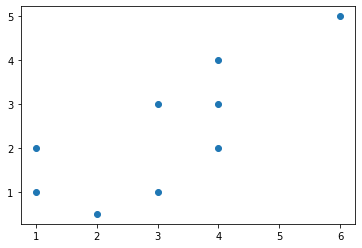

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline
x = [1, 1, 2, 3, 4, 3, 4, 6, 4]
y = [2, 1, 0.5, 1, 3, 3, 2, 5, 4]
plt.figure(figsize = (8,8))
fig, ax = plt.subplots()

ax.scatter(x,y)
plt.show()

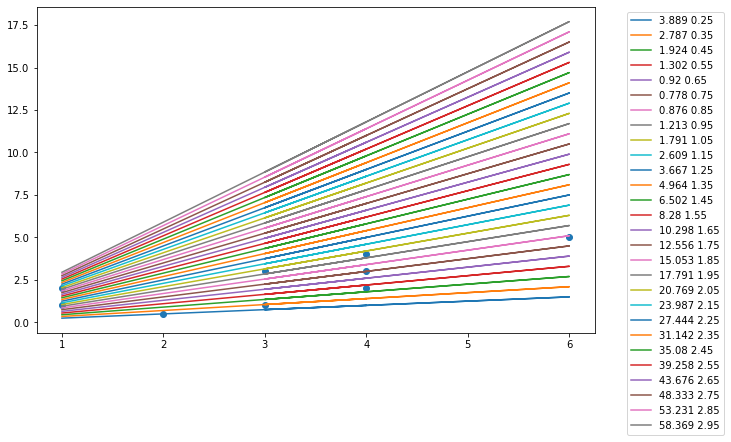

In [2]:
from matplotlib.font_manager import FontProperties
beta_0 = 0
#beta_1 = [.25, .5, .75, .8, 1,]
beta_1 = np.arange(0.25,3,0.1) # start, stop, step
fig, ax = plt.subplots(figsize=(10,6))
mses = []
for t in beta_1:
    line = beta_0 + (np.array(x)*t)
    mse = round(mean_squared_error(y, line),3)
    mses.append(mse)
    ax.plot(x, line, label=f'{round(mse, 3)} {round(t, 2)}')
ax.scatter(x,y)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

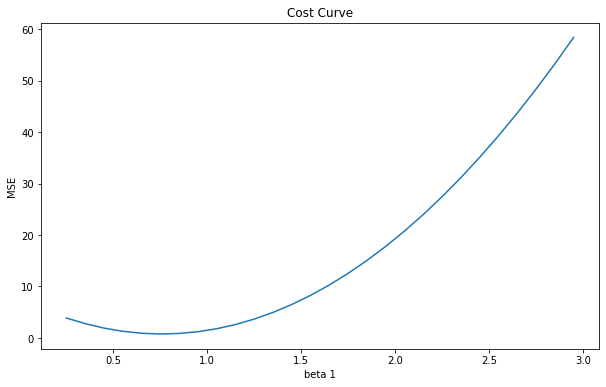

In [3]:
# Plot the Cost Curve
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_1, mses)
ax.set_title('Cost Curve')
ax.set_xlabel('beta 1')
ax.set_ylabel('MSE')
plt.show()

In [7]:
import pandas as pd
df = pd.read_excel('movie_data.xlsx')
df.head()

XLRDError: Excel xlsx file; not supported

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model')
plt.scatter(x, 1.331*x, label='Median Ratio Model')
plt.scatter(df.budget, df.domgross, label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

NameError: name 'df' is not defined

In [12]:
def rss(m, X=df.budget, y= df.domgross):
    model = m * X
    residuals = model - y
    total_rss = residuals.map(lambda x: x**2).sum()
    return total_rss

print('Model 1 RSS: ', rss(1.575))
print('Model 2 RSS: ', rss(1.331))

Model 1 RSS:  2.7614512142376128e+17
Model 2 RSS:  2.3547212057814554e+17


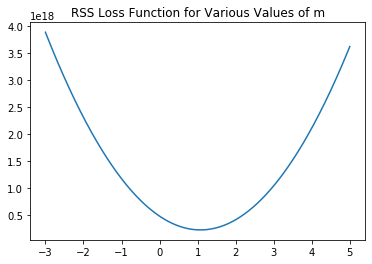

In [13]:
x = np.linspace(start=-3, stop=5, num=10**3)
y = [rss(xi) for xi in x]
plt.plot(x,y)
plt.title('RSS Loss Function for Various Values of m')
plt.show()

In [23]:
cur_x = 1.5
alpha = 1*10**(-7)
prec = 0.0000000001
prev_ss = 1
max_iters = 10000
iters = 0
while (prev_ss > prec) & (iters < max_iters):
    print('Çurrent Value: {}, RSS Produced: {}'.format(cur_x, rss(cur_x)))
    prev_x = cur_x
    x_reg = np.linspace(start = cur_x - prev_ss, stop = cur_x + prev_ss, num = 101)
    rss_reg = [np.sqrt(rss(m)) for m in x_reg]
    grad = np.gradient(rss_reg)[50]
    cur_x -= alpha * grad
    prev_ss = abs(cur_x - prev_x)
    iters+=1
print('The local minimum occurs at: ', cur_x)

Çurrent Value: 1.5, RSS Produced: 2.6084668957174013e+17
Çurrent Value: 1.133065571442482, RSS Produced: 2.217773053377031e+17
Çurrent Value: 1.1131830522748978, RSS Produced: 2.2135715390729418e+17
Çurrent Value: 1.1124754156940848, RSS Produced: 2.21345414998669e+17
Çurrent Value: 1.1124506992634624, RSS Produced: 2.2134500897406422e+17
Çurrent Value: 1.1124498365366489, RSS Produced: 2.213449948066475e+17
Çurrent Value: 1.1124498064238728, RSS Produced: 2.2134499431215123e+17
Çurrent Value: 1.1124498053728105, RSS Produced: 2.213449942948913e+17
The local minimum occurs at:  1.1124498053361267


## Part II. Logistic Regression 
- How does linear regression differ from logistic regression?
- Why is logistic regression better at modeling a binary outcome?
- What are some advantages and disadvantages of logistic regression?

### Class Notes

- linear best for continuous target variable and logistic best for binary or categorial target variable
- modeling the logged odds of the inputs and coefficients
- instead look at the probability, beta can now take on any value from positive to negative infinity
- advantages and disadvantages?
- assumptions for logistic regression is that the variables are still independent
- uses gradient descent as part of its algorithm, could be a problem if you could not find global minimum only local minimum
- less likely to overfit but more likely to underfit


### Comparison to linear regression

- linear helps us predict a continuous variable (like numbers in a range) like a student's test score
- logistic helps us predict whether a student passed or failed, discrete variable, specific values or categories

### Linear regression setup

`predict_y()` takes in a matrix `X` of observations and a vector of feature weights `w` and outputs a vector of predictions for the various observations.
  
$$ \large \hat{y}_i = X_{i1} \cdot w_1 + X_{i2} \cdot w_2 + X_{i3} \cdot w_3 + ... + X_{in} \cdot w_n $$

### Sigmoid function

$$ S(x) = \dfrac{1}{1+e^(-x)} $$

### Gradient descent with sigmoid function

- calculate error vector based on current model's feature weights
- multiply transpose of training matrix itself by error vector in order to obtain gradient
- take gradient, multiply it by step size and add this to current weight vector to update

function takes 5 inputs:
1. X
2. y
3. max_iterations
4. alpha (the step size)
5. initial_weights

By default, have your function set the initial_weights parameter to a vector where all feature weights are set to 1.

In [1]:
import numpy as np
def predict_y(X, w):
    return np.dot(X,w)

def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))

import matplotlib.pyplot as plt
%matplotlib inline

# Plot sigmoid
x = np.linspace(start=-20, stop=20, num=10**4)
y = [sigmoid(xi) for xi in x]
plt.scatter(x, y)
plt.title('The Sigmoid Function')
plt.show()

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col

In [ ]:
import pandas as pd
df = pd.read_csv('heart.csv')

# Create the predictor and target variables
y = df['target']
X = df.drop(columns=['target'], axis=1)

print(y.value_counts())
X.head()

In [ ]:
weights, weight_col = grad_desc(X, y, 10000, 0.001)
weight_col.columns = np.arange(len(weight_col.columns))

plt.figure(figsize=(16, 12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')

In [1]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X, y)
print("Scikit-learn's weights:", logreg.coef_[0])
print("Our manual regression weights:", weights)

ModuleNotFoundError: No module named 'sklearn'

## Part III. Evaluation Metrics 
- What are precision and recall?
- How to evaluate a logistic regression model?
- What is roc auc curve?
- What is class imbalance and how do we deal with it?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

<img src = 'confusion_matrix.png' width = 300>

In [26]:
df = pd.read_csv('heart.csv')
X = df[df.columns[:-1]]
y = df.target
for col in df.columns:
    df[col] = (df[col] - min(df[col]))/ (max(df[col]) - min(df[col]))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
print(model_log)
y_hat_test = logreg.predict(X_test)
print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


### Confusion Matrix

In [27]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            if label == pred:
                cm['TP'] += 1
            else:
                cm['FN'] += 1
        else:
            if label == pred:
                cm['TN'] += 1
            else:
                cm['FP'] += 1
    return cm 
conf_matrix(y_test, y_hat_test)

{'TP': 39, 'TN': 24, 'FP': 9, 'FN': 4}

Confusion Matrix:
 [[24  9]
 [ 4 39]]



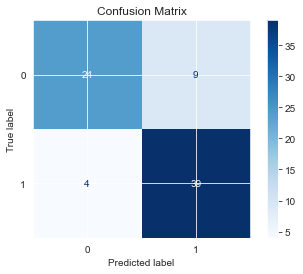

In [30]:
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.legend()
print("")
plt.show()

<AxesSubplot:>

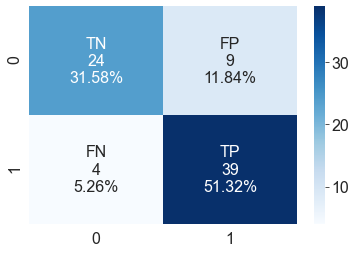

In [50]:
import seaborn as sns
import numpy as np
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={'size':16})

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,annot_kws={'size':16})

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

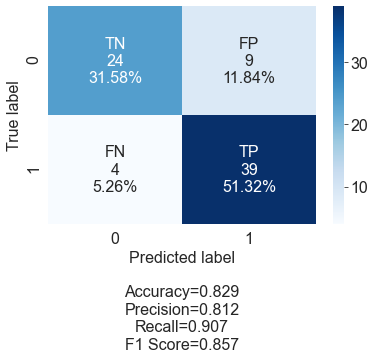

In [49]:
labels = ['TN','FP','FN','TP']
categories = ['0', '1']
make_confusion_matrix(cnf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Accuracy, Precision, Recall, and F1 Score

In [3]:
### calculate precision here
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

In [4]:
### calculate recall here
def recall(y, y_hat):
    # Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

In [5]:
def accuracy(y, y_hat):
    # Your code here
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_y_hat))

In [6]:
def f1(y, y_hat):
    # Your code here
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [7]:
# Your code here
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('Training F1 Score: ', f1(y_train, y_hat_train))
print('Testing F1 Score: ', f1(y_test, y_hat_test))

Training Precision:  0.8396946564885496
Testing Precision:  0.8125
Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465
Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527
Training F1 Score:  0.8695652173913043
Testing F1 Score:  0.8571428571428572


In [8]:
# Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('Training F1 Score: ', f1_score(y_train, y_hat_train))
print('Testing F1 Score: ', f1_score(y_test, y_hat_test))


Training Precision:  0.8396946564885496
Testing Precision:  0.8125
Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465
Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527
Training F1 Score:  0.8695652173913043
Testing F1 Score:  0.8571428571428572


In [9]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100.0) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    
    # Your code here
    training_precision.append(precision(y_train, y_hat_train))
    testing_precision.append(precision(y_test, y_hat_test))
    training_recall.append(recall(y_train, y_hat_train))
    testing_recall.append(recall(y_test, y_hat_test))
    training_accuracy.append(accuracy(y_train, y_hat_train))
    testing_accuracy.append(accuracy(y_test, y_hat_test))
    training_f1.append(f1(y_train, y_hat_train))
    testing_f1.append(f1(y_test, y_hat_test))


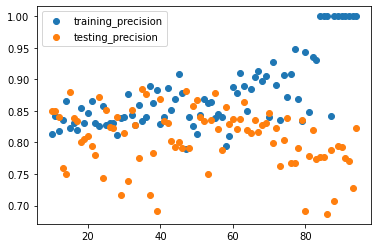

In [10]:
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

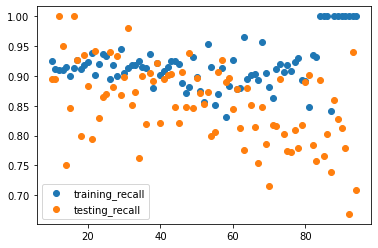

In [11]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

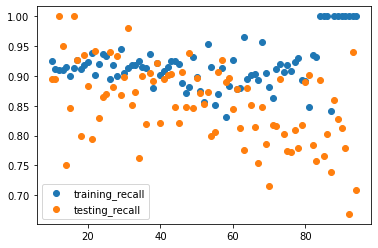

In [12]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

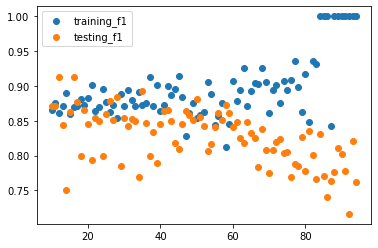

In [13]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

In [ ]:
### calculate F1 score here
2 * ((P*R)/ (P+R))

F1 Score is harmonic mean valued from 0 to 1 for a balance between precision and recall


### ROC-AUC Curve


**Explain which model below has the best performance based on ROC-AUC curve? Why?**

<img src='roc_auc.png' width = 400>

plot FP on x axis and TP on the y-axis at every given threshold of given classifier

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')
# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)
# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)
# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params
# Predict
y_hat_test = logreg.predict(X_test)
# Data preview
print("")
df.head()

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
from sklearn.metrics import roc_curve, auc
# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites
# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [23]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8823114869626498


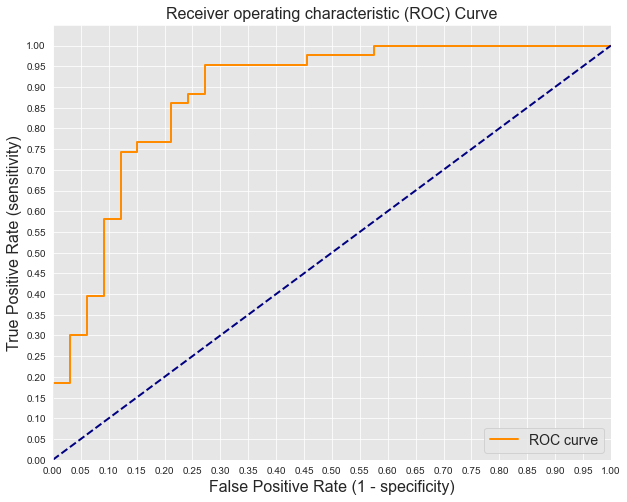

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=16)
plt.ylabel('True Positive Rate (sensitivity)', fontsize=16)
plt.title('Receiver operating characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.show()

### Class Imbalance
<img src = 'imbalanced.png' wid = 300>

- predict everything as the majority and not abe to pick up on the minority features at all, overly attuned to the majority class
- predict everything as zero and still get a high amount of precision 

tomek links:  pairs up a minority and 

smote:  synthetic data by creating a connection between the two data points 

In [ ]:
### what problem would it cause? 

In [ ]:
### How to remedy it?

### Solution 1 - Resampling
<img src = 'resampling.png'>

#### Solution 2 - Smote
<img src = 'smote.png'>

#### Solution 3 - Tomek Link 
<img src = 'tomek.png'>

## Part III. Decision Trees
- Build trees with the sklearn machine learning framework

In [3]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree


In [5]:
# import the dataset and set up predictors and target
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# define x and y 
y = titanic['survived']
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'adult_male']]

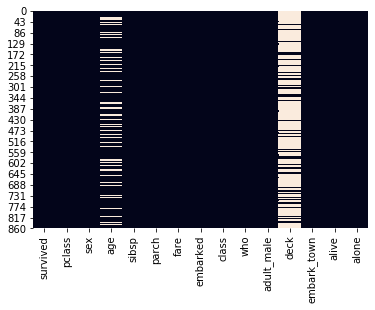

In [13]:
# fill the age columns missing value with mean 
sns.heatmap(titanic.isna(), cbar=False)

In [14]:
values = {'age': X['age'].mean()}
X = X.fillna(value=values)

In [15]:
X['sex'] = X.sex.apply(lambda x: 0 if x=='male' else 1)

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
# fit the tree
clf = DecisionTreeClassifier()
# look into parameters of classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
# test the tree
y_pred = clf.predict(X_test)

In [20]:
# generate prediction and output metric (use accuracy)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7486033519553073


In [22]:
# how did our tree do?
y.value_counts()[0]/y.value_counts().sum()
# put into perspective how good is the accuracy

0.6161616161616161